In [11]:
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt

# Feeding the data

In [12]:
History_demand= { 'Quantity' : ['20-29', '30–39', '40–49','50-59', '60-69', 
                                         '70-79', '80-89', '90-100'],
        'frequency' : [228,80,186,112,17,83,13,11]
}

In [13]:
global df
df = pd.DataFrame(History_demand)
df

,Quantity,frequency
0,20-29,228
1,30–39,80
2,40–49,186
3,50-59,112
4,60-69,17
5,70-79,83
6,80-89,13
7,90-100,11


## Calculating relative frequency/probability and cummulative probabilities

In [14]:
probability=[]

for i in range(len(df)):
    probability.append(df['frequency'][i]/sum(df['frequency']))

df['probability of occurence']=probability

In [15]:
#column for cummulative probability
cummulative_probability=[]

for i in range(1,9):
    cummulative_probability.append(sum(df['probability of occurence'][:i]))
df['cummulative_probability']=cummulative_probability
df

,Quantity,frequency,probability of occurence,cummulative_probability
0,20-29,228,0.312329,0.312329
1,30–39,80,0.109589,0.421918
2,40–49,186,0.254795,0.676712
3,50-59,112,0.153425,0.830137
4,60-69,17,0.023288,0.853425
5,70-79,83,0.113699,0.967123
6,80-89,13,0.017808,0.984932
7,90-100,11,0.015068,1.000000


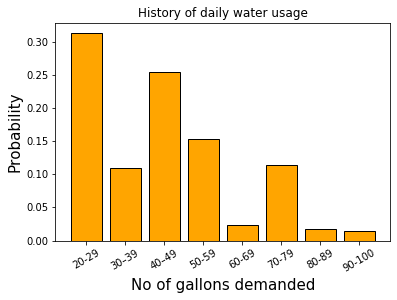

In [16]:
#Histogram of cummulative
xo=np.array(df['Quantity'])
xo
y=np.array(df['probability of occurence'])
y
# this is for plotting purpose
index = np.arange(len(df))
plt.bar(index,y,color='orange',edgecolor='black')
plt.xlabel('No of gallons demanded', fontsize=15)
plt.ylabel('Probability', fontsize=15)
plt.xticks(index,xo, fontsize=10, rotation=30)
plt.title('History of daily water usage')

plt.show()

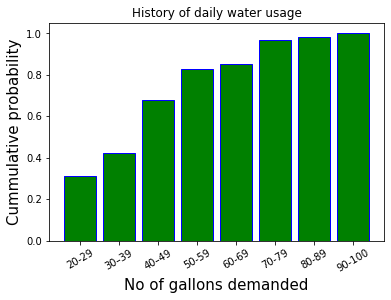

In [17]:
#Histogram of cummulative
xo=np.array(df['Quantity'])
y=np.array(df['cummulative_probability'])

# this is for plotting purpose
#plt.figure(figsize=[10,8])
index = np.arange(len(y))
plt.bar(index,y,color='green',edgecolor='b')
plt.xlabel('No of gallons demanded', fontsize=15)
plt.ylabel('Cummulative probability', fontsize=15)
plt.xticks(index,xo, fontsize=10, rotation=30)
plt.title('History of daily water usage')

plt.show()

## Generation of historical daily demand rates

In [18]:
def random_numbers(df,trials):

    count=[0 for i in range(len(df))]

    for i in range(trials):
        x=random.uniform(0, 1)
        #print(x)

        if x>=0 and x<df['cummulative_probability'][0]:
            count[0]+=1

        elif x>=df['cummulative_probability'][0] and x<df['cummulative_probability'][1]:
            count[1]+=1

        elif x>=df['cummulative_probability'][1] and x<df['cummulative_probability'][2]:
            count[2]+=1

        elif x>=df['cummulative_probability'][2] and x<df['cummulative_probability'][3]:
            count[3]+=1

        elif x>=df['cummulative_probability'][3] and x<df['cummulative_probability'][4]:
            count[4]+=1

        elif x>=df['cummulative_probability'][4] and x<df['cummulative_probability'][5]:
            count[5]+=1

        elif x>=df['cummulative_probability'][5] and x<df['cummulative_probability'][6]:
            count[6]+=1

        elif x>=df['cummulative_probability'][6] and x<=1:
            count[7]+=1
            
    return count


In [19]:
x1=random_numbers(df,1000) 
x1

[322, 109, 267, 141, 22, 102, 25, 12]

In [20]:
x2=random_numbers(df,10000)
x2

[3121, 1072, 2573, 1505, 228, 1159, 190, 152]

In [21]:
x3=random_numbers(df,100000)
x3

[31427, 10909, 25330, 15331, 2338, 11465, 1706, 1494]

In [22]:
df2=df.filter(['Quantity','probability of occurence'])
df2['Result from 1000 simulation']=[i/1000 for i in x1]
df2['Result from 10000 simulation']=[i/10000 for i in x2]
df2['Result from 100000 simulation']=[i/100000 for i in x3]
df2

,Quantity,probability of occurence,Result from 1000 simulation,Result from 10000 simulation,Result from 100000 simulation
0,20-29,0.312329,0.322,0.3121,0.31427
1,30–39,0.109589,0.109,0.1072,0.10909
2,40–49,0.254795,0.267,0.2573,0.25330
3,50-59,0.153425,0.141,0.1505,0.15331
4,60-69,0.023288,0.022,0.0228,0.02338
5,70-79,0.113699,0.102,0.1159,0.11465
6,80-89,0.017808,0.025,0.0190,0.01706
7,90-100,0.015068,0.012,0.0152,0.01494


## Plotting and comparing the results from 10,000 and 100,000 simulation

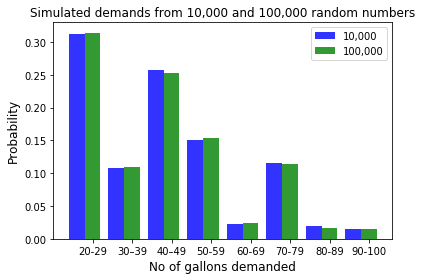

In [23]:
# data to plot
x2=np.array(df2['Result from 10000 simulation'])
x3=np.array(df2['Result from 100000 simulation'])

# create plot
#plt.figure(figsize=[20,15])
fig, ax = plt.subplots()
index = np.arange(len(x2))
bar_width = 0.4
opacity = 0.8


rects1 = plt.bar(index, x2, bar_width,
alpha=opacity,
color='b',
label='10,000')

rects2 = plt.bar(index + bar_width, x3, bar_width,
alpha=opacity,
color='g',
label='100,000')

plt.xlabel('No of gallons demanded', fontsize=12)
plt.ylabel('Probability', fontsize=12)
plt.title('Simulated demands from 10,000 and 100,000 random numbers')
plt.xticks(index + bar_width, xo, fontsize=10)
plt.legend()

plt.tight_layout()
plt.show()

#plt.xticks(index,xo, fontsize=10, rotation=30)

# plt.show()

## Graph for spline

,Quantity,Midpoints,cumulative probabilites
0,20-29,25,0.312329
1,30–39,35,0.421918
2,40–49,45,0.676712
3,50-59,55,0.830137
4,60-69,65,0.853425
5,70-79,75,0.967123
6,80-89,85,0.984932
7,90-100,95,1.000000


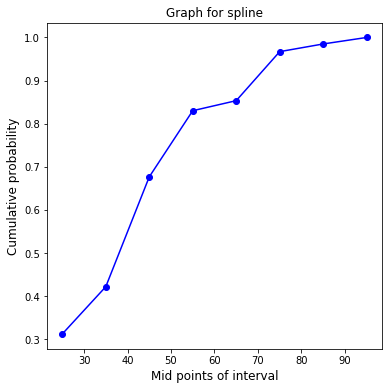

In [24]:
y = np.array(df['cummulative_probability'])
x = [25,35,45,55,65,75,85,95]

df3=df.filter(['Quantity'])
df3['Midpoints']=x
df3['cumulative probabilites']=df['cummulative_probability']

plt.figure(figsize=[6,6])
plt.xlabel('Mid points of interval',fontsize=12)
plt.ylabel('Cumulative probability',fontsize=12)
plt.title('Graph for spline')
plt.plot(x, y,marker='o',color='blue')
df3

## Demand submodel

In [25]:
def demand_submodel(x):
    qi=0
    
    if x>=0 and x<df['cummulative_probability'][0]:
        qi=(20+29)/2

    elif x>=df['cummulative_probability'][0] and x<df['cummulative_probability'][1]:
        qi=(30+39)/2

    elif x>=df['cummulative_probability'][1] and x<df['cummulative_probability'][2]:
        qi=(40+49)/2

    elif x>=df['cummulative_probability'][2] and x<df['cummulative_probability'][3]:
        qi=(50+59)/2

    elif x>=df['cummulative_probability'][3] and x<df['cummulative_probability'][4]:
        qi=(60+69)/2

    elif x>=df['cummulative_probability'][4] and x<df['cummulative_probability'][5]:
        qi=(70+79)/2

    elif x>=df['cummulative_probability'][5] and x<df['cummulative_probability'][6]:
        qi=(80+89)/2

    elif x>=df['cummulative_probability'][6] and x<=1:
        qi=(90+100)/2

    return qi

In [26]:
def sim_model(Q,T,N,d,s):
    
    #step 1
    K = N
    I = 0
    C = 0
    Flag = True
    no_water=0

    while Flag:
        #step2
        I = I + Q
        C = C + d

        #step3
        if T>=K:
            T=K
            Flag=False

        #step4
        for i in range(1,T+1):
            #step5
            xi = random.uniform(0, 1)
            #print(xi)

            #step6
            qi = demand_submodel(xi)
            #print(qi)

            #step7
            I = I- qi

            #step8
            if I<=0:
                I=0
                no_water+=1
                continue
            else:
                C = C + I*s        

            #step9
            K = K - 1

        #step10    
        if Flag==True:
            continue

        else:
            #step11
            c = C/N
            c=round(c,2)

            #step12
            #print("Average daily cost: {}".format(c) +"$")
            break

    return [c,no_water]

In [27]:
# Parameters
Q = 800      # Delivery quantity (gallons)
T = 15       # Time between deliveries (days)
N = 365      # Length of simulation (days)
d = 92.00    # Delivery cost (dollars per delivery)
s = 0.001    # Storage cost (dollars per gallon per day)


results=sim_model(Q,T,N,d,s)
print('Average daily cost:{}'.format(results[0])+'$')
print('\nDays without water:{}'.format(results[1]))

Average daily cost:8.3$

Days without water:0


## Histogram for avg daily cost

In [28]:
t=np.array([sim_model(Q,T,N,d,s)[0] for i in range(100)])

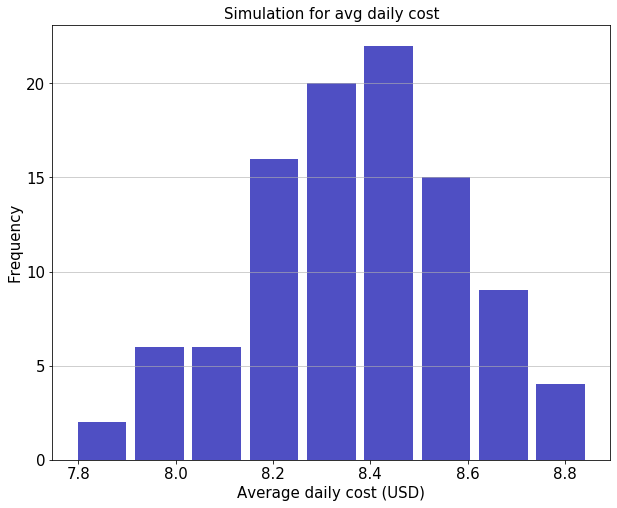

In [29]:
plt.figure(figsize=[10,8])
n, bins, patches = plt.hist(x=t, bins='auto', color='#0504aa',alpha=0.7, rwidth=0.85)
plt.grid(axis='y', alpha=0.75)
plt.xlabel('Average daily cost (USD)',fontsize=15)
plt.ylabel('Frequency',fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.title('Simulation for avg daily cost',fontsize=15)
plt.show()

## Trial and Error

In [30]:
# Parameters
Q = 800      # Delivery quantity (gallons)
T = 15       # Time between deliveries (days)
N = 365      # Length of simulation (days)
d = 92.00    # Delivery cost (dollars per delivery)
s = 0.001    # Storage cost (dollars per gallon per day)


results=sim_model(Q,T,N,d,s)
print('Average daily cost:{}'.format(results[0])+'$')
print('\nDays without water:{}'.format(results[1]))

Average daily cost:8.32$

Days without water:0


In [31]:
# Parameters
Q = 900      # Delivery quantity (gallons)
T = 20       # Time between deliveries (days)
N = 365      # Length of simulation (days)
d = 92.00    # Delivery cost (dollars per delivery)
s = 0.001    # Storage cost (dollars per gallon per day)


results=sim_model(Q,T,N,d,s)
print('Average daily cost:{}'.format(results[0])+'$')
print('\nDays without water:{}'.format(results[1]))

Average daily cost:5.34$

Days without water:3


In [32]:
# Parameters
Q = 1100     # Delivery quantity (gallons)
T = 22       # Time between deliveries (days)
N = 365      # Length of simulation (days)
d = 92.00    # Delivery cost (dollars per delivery)
s = 0.001    # Storage cost (dollars per gallon per day)


results=sim_model(Q,T,N,d,s)
print('Average daily cost:{}'.format(results[0])+'$')
print('\nDays without water:{}'.format(results[1]))

Average daily cost:5.72$

Days without water:0


In [33]:
# Parameters
Q = 1400     # Delivery quantity (gallons)
T = 30       # Time between deliveries (days)
N = 365      # Length of simulation (days)
d = 92.00    # Delivery cost (dollars per delivery)
s = 0.001    # Storage cost (dollars per gallon per day)


results=sim_model(Q,T,N,d,s)
print('Average daily cost:{}'.format(results[0])+'$')
print('\nDays without water:{}'.format(results[1]))

Average daily cost:4.5$

Days without water:0
